## Path to Source

In [1]:
# load local version before pip installed version, for debugging
import sys
import pathlib

sys.path.append(pathlib.Path(__file__).parent.parent.joinpath("src"))

## Imports

In [2]:
import numpy as np
import yt
import matplotlib.pyplot as plt

from gallifrey.data.load import load_snapshot
from gallifrey.halo import MainHalo
from gallifrey.utilities.time import Timer

## Load Data

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [4]:
ds = load_snapshot(snapshot, resolution)
mw = MainHalo("MW", resolution, ds, sim_id=sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-02-23 13:42:29,316 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-02-23 13:42:29,379 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-02-23 13:42:29,380 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-02-23 13:42:29,380 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-23 13:42:29,381 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-02-23 13:42:29,381 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-23 13:42:29,382 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-02-23 13:42:29,382 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-02-23 13:42:29,382 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-02-23 13:42:29,383 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## Data Inspection

In [5]:
list(ds.fields.PartType4)

yt : [INFO     ] 2023-02-23 13:42:29,615 Allocating for 1.920e+08 particles
Loading particle index: 100%|███████████████| 245/245 [00:00<00:00, 3673.19it/s]


[On-Disk Field ('PartType4', 'BirthDensity'): (units: '', particle field),
 On-Disk Field ('PartType4', 'BirthPos'): (units: '', particle field),
 On-Disk Field ('PartType4', 'BirthVel'): (units: '', particle field),
 On-Disk Field ('PartType4', 'Coordinates'): (units: 'code_length', particle field),
 On-Disk Field ('PartType4', 'GFM_InitialMass'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metallicity'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_00'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_01'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_02'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_03'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_04'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_05'): (units: '', particle field),
 On-Disk Field ('PartType4', 'GFM_Metals_06'): (units: '', particle field),
 On-Disk F

## Plots

### Maps

yt : [INFO     ] 2023-02-23 13:42:45,447 xlim = -0.018637 0.018637
yt : [INFO     ] 2023-02-23 13:42:45,447 ylim = -0.018637 0.018637
yt : [INFO     ] 2023-02-23 13:42:45,448 zlim = -50.000000 50.000000
yt : [INFO     ] 2023-02-23 13:42:45,450 Making a fixed resolution buffer of (('PartType0', 'GFM_Metallicity')) 800 by 800



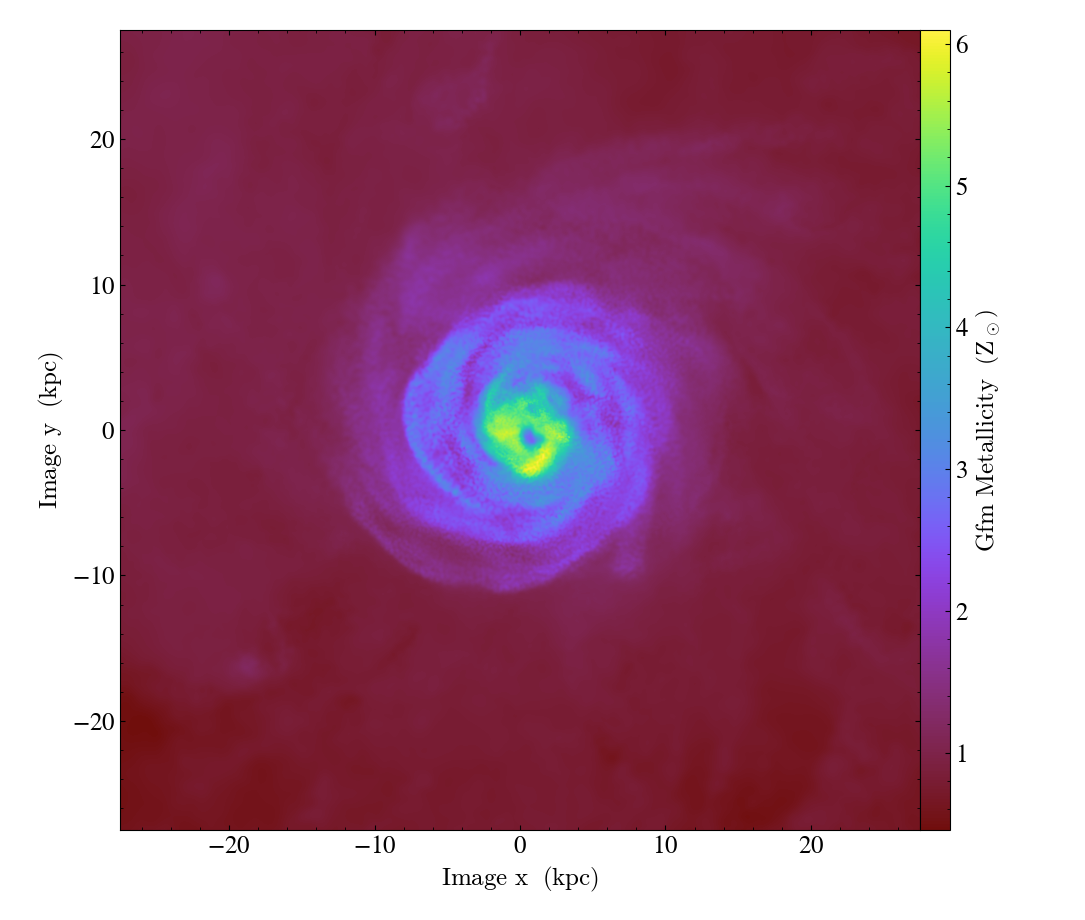

In [6]:
# gas density-weighted gas metallicity
p = yt.ProjectionPlot(
    ds,
    #normal='z',
    normal=mw.sphere().quantities.angular_momentum_vector(),
    fields=("PartType0", "GFM_Metallicity"),
    weight_field=("PartType0", "density"),
    data_source=mw.sphere(),
    center=mw.centre(),
    width=(55, "kpc"),
)

p.set_unit(("PartType0", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType0", "GFM_Metallicity"), False)
p.show()

yt : [INFO     ] 2023-02-23 13:43:11,349 xlim = 69017.183488 69072.183488
yt : [INFO     ] 2023-02-23 13:43:11,350 ylim = 72371.296075 72426.296075
yt : [INFO     ] 2023-02-23 13:43:11,351 xlim = 69017.183488 69072.183488
yt : [INFO     ] 2023-02-23 13:43:11,352 ylim = 72371.296075 72426.296075
yt : [INFO     ] 2023-02-23 13:43:11,353 Splatting (('PartType4', 'GFM_Metallicity')) onto a 800 by 800 mesh using method 'cic'



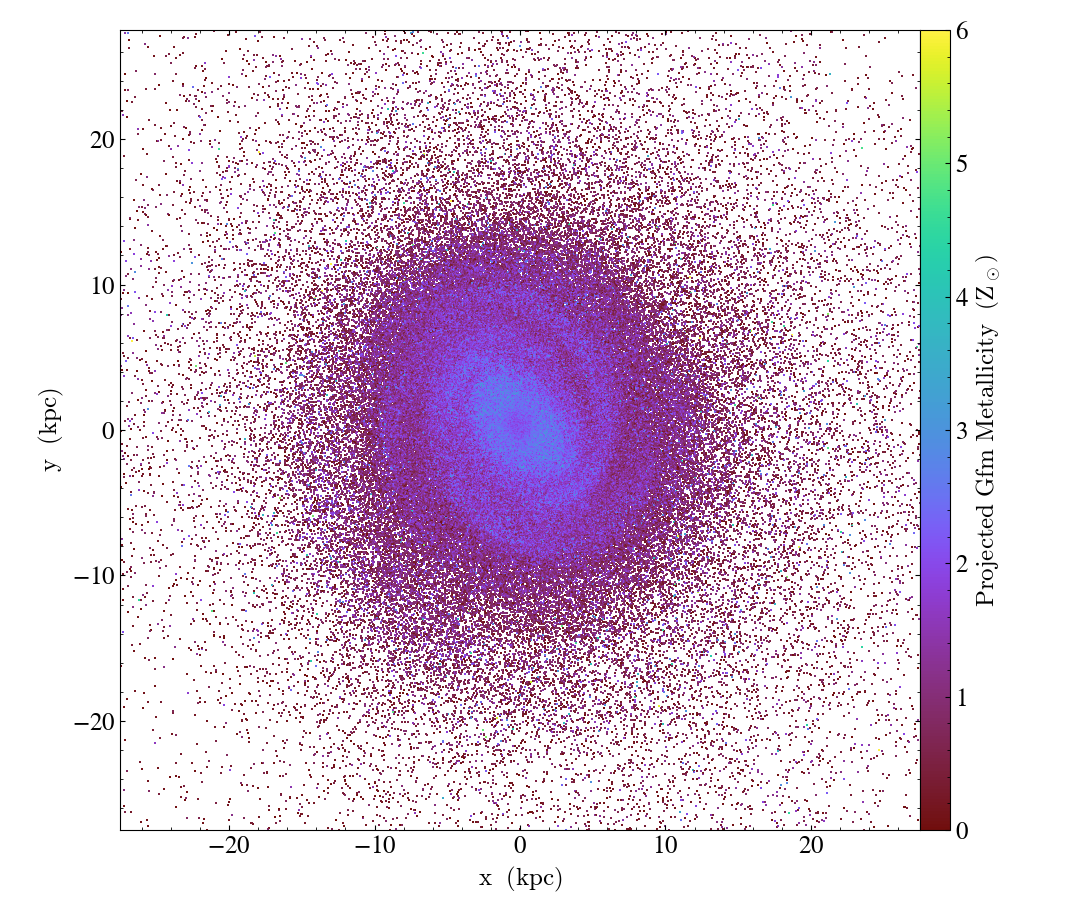

In [7]:
# average stellar metallicities
p = yt.ParticleProjectionPlot(
    ds,
    axis='z',
    fields=("PartType4", "GFM_Metallicity"),
    weight_field=("PartType4", "particle_ones"),
    data_source=mw.sphere(),
    center=mw.centre(),
    width=(55, "kpc"),
    deposition='cic',
)
p.set_unit(("PartType4", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType4", "GFM_Metallicity"), False)
p.set_zlim(("PartType4", "GFM_Metallicity"), zmin=(0, "Zsun"), zmax=(6, "Zsun"))
p.show()

### Profiles


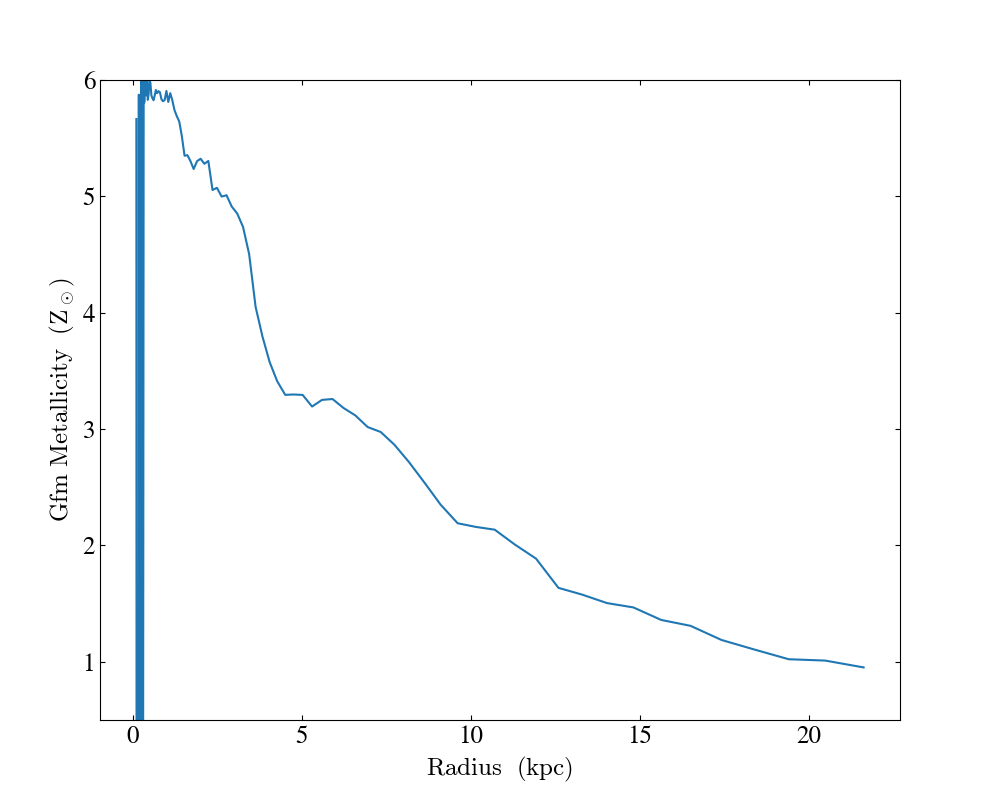

In [8]:
# density-weighted gas metallicity
gas_profile = yt.create_profile(
    data_source=mw.disk(radius=ds.quan(20,'kpc')),
    bin_fields=[("PartType0", "radius")],
    fields=[("PartType0", "GFM_Metallicity")],
    n_bins=100,
    units={('PartType0', 'radius'): 'kpc', ('PartType0','GFM_Metallicity'): 'Zsun'},
    weight_field=('PartType0', 'density'),
)

plot = yt.ProfilePlot.from_profiles(gas_profile)
plot.set_log(("PartType0", "radius"), False)
plot.set_log(("PartType0", "GFM_Metallicity"), False)
plot.set_ylim(('PartType0','GFM_Metallicity'),0.5, 6)
plot.show()


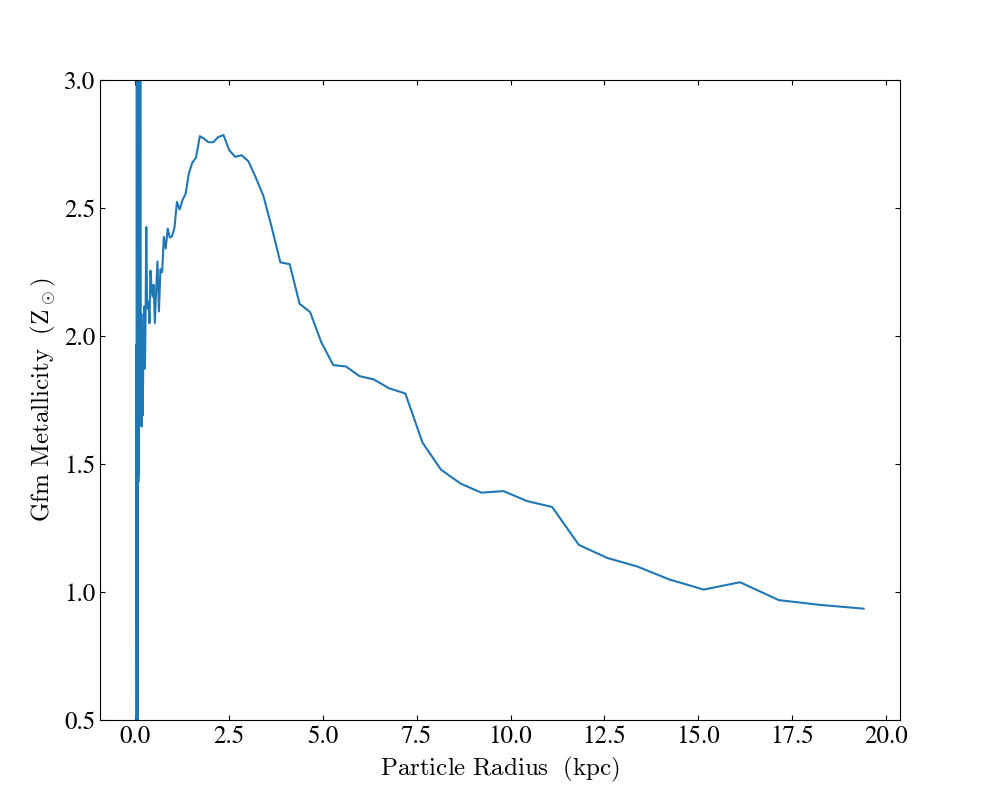

In [9]:
# average stellar metallicity profile
star_profile = yt.create_profile(
    data_source=mw.disk(radius=ds.quan(20,'kpc')),
    bin_fields=[("PartType4", "particle_radius")],
    fields=[("PartType4", "GFM_Metallicity")],
    n_bins=100,
    units={('PartType4', 'particle_radius'): 'kpc', ('PartType4','GFM_Metallicity'): 'Zsun'},
    weight_field=('PartType4', 'particle_ones'),
)

plot = yt.ProfilePlot.from_profiles(star_profile)
plot.set_log(('PartType4', 'particle_radius'), False)
plot.set_log(('PartType4','GFM_Metallicity'), False)
plot.set_ylim(('PartType4','GFM_Metallicity'),0.5, 3)
plot.show()

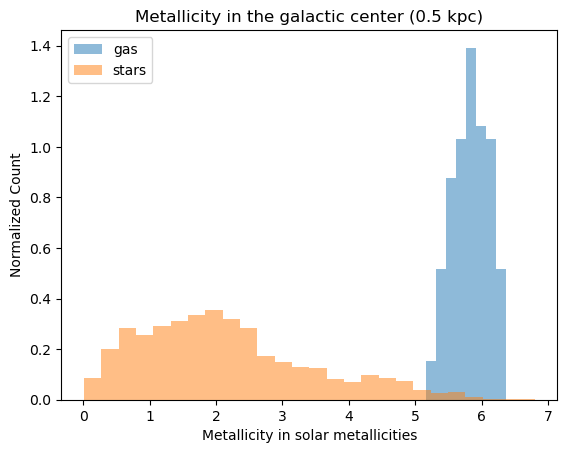

In [13]:
# metallicity histogram - galactic center
plt.hist(mw.sphere(radius=ds.quan(0.5,'kpc'))['PartType0','GFM_Metallicity'].to('Zsun').value, density=True, bins='fd', label='gas', alpha=0.5)
plt.hist(mw.sphere(radius=ds.quan(0.5,'kpc'))['PartType4','GFM_Metallicity'].to('Zsun').value, density=True, bins='fd', label='stars', alpha=0.5)
plt.xlabel('Metallicity in solar metallicities')
plt.ylabel('Normalized Count')
plt.title('Metallicity in the galactic center (0.5 kpc)')
plt.legend()
plt.show()

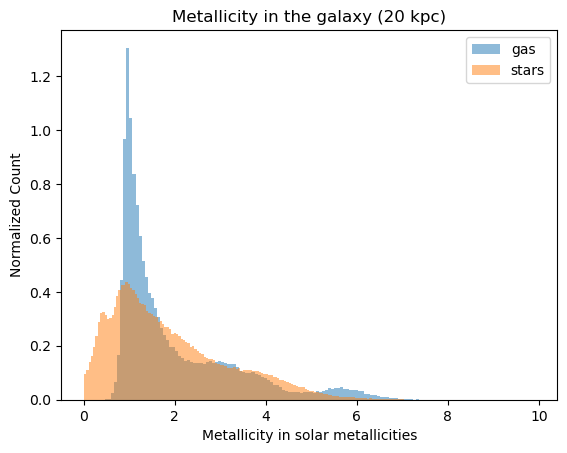

In [12]:
# metallicity histogram - 20kpc
plt.hist(mw.sphere(radius=ds.quan(20,'kpc'))['PartType0','GFM_Metallicity'].to('Zsun').value, density=True, bins='fd', label='gas', alpha=0.5)
plt.hist(mw.sphere(radius=ds.quan(20,'kpc'))['PartType4','GFM_Metallicity'].to('Zsun').value, density=True, bins='fd', label='stars', alpha=0.5)
plt.xlabel('Metallicity in solar metallicities')
plt.ylabel('Normalized Count')
plt.title('Metallicity in the galaxy (20 kpc)')
plt.legend()
plt.show()